## Mall Customer Analysis Using K-Means Cluster Analysis

### Name - Daksh
### LinkedIN - www.linkedin.com/in/daksh-tyagi/

### Prodigy InfoTech Internship: Task-2
Create a K-Means clustering algorithm to group customers of a retail store based on their purchase history.
#### Sample Data: [Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)


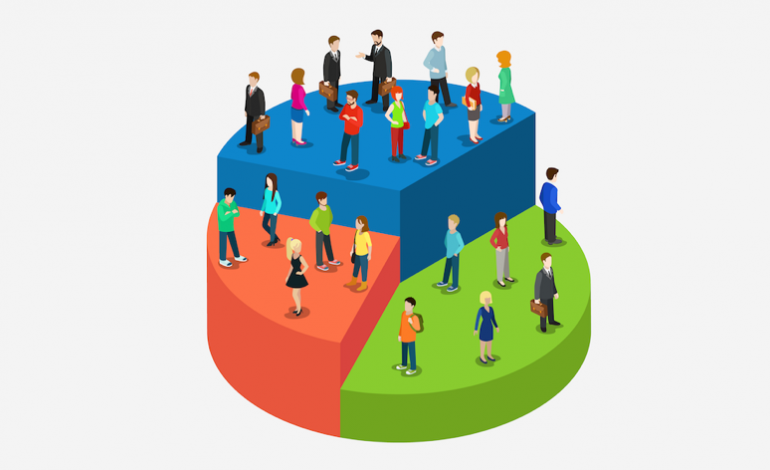

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1600x1000 with 0 Axes>

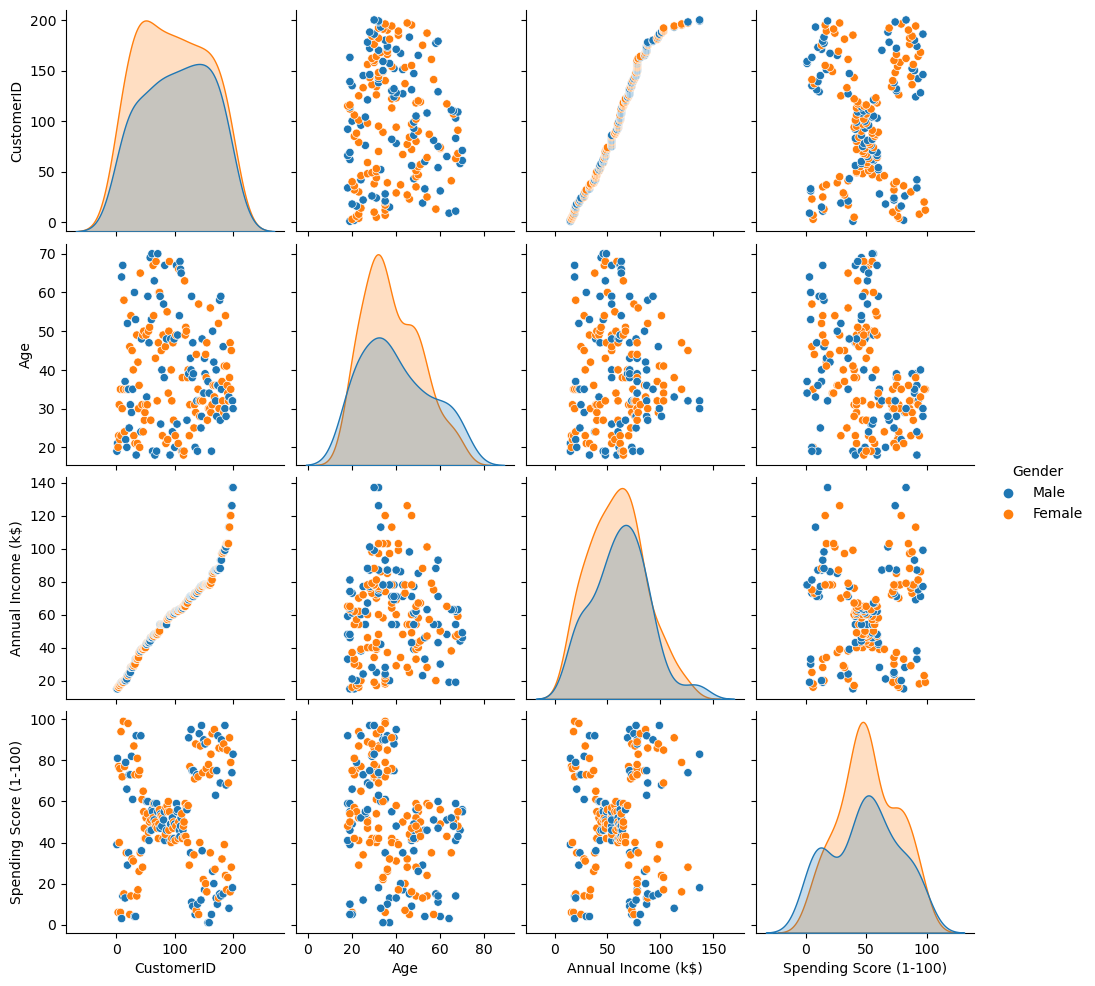

In [8]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue= 'Gender')
plt.show()

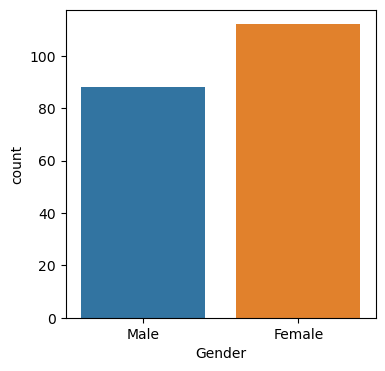

In [9]:
plt.figure(1, figsize=(4,4))
sns.countplot(x= 'Gender', data=df)
plt.show()

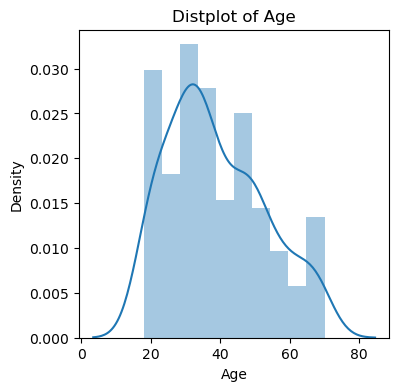

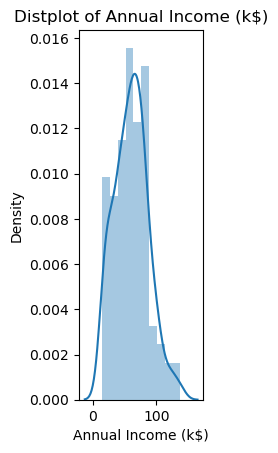

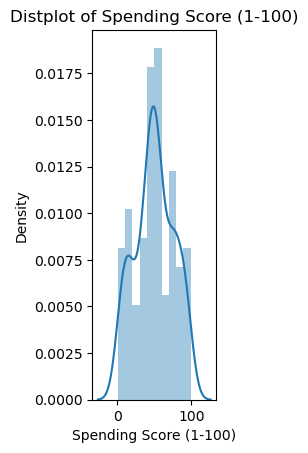

In [10]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
    plt.show()

In [11]:
x = df.iloc[:, -2:]

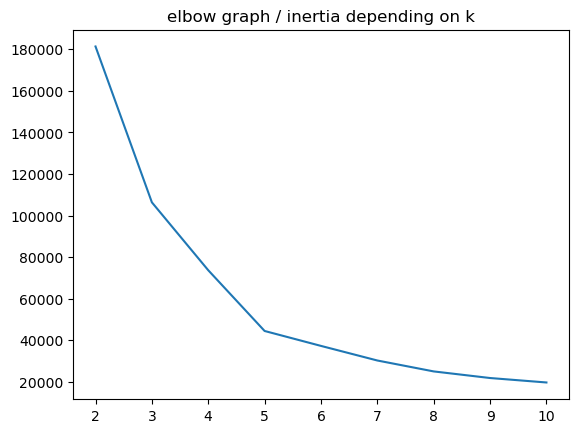

In [12]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(x)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(x, km.labels_))
sns.lineplot(x=range(2,11), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

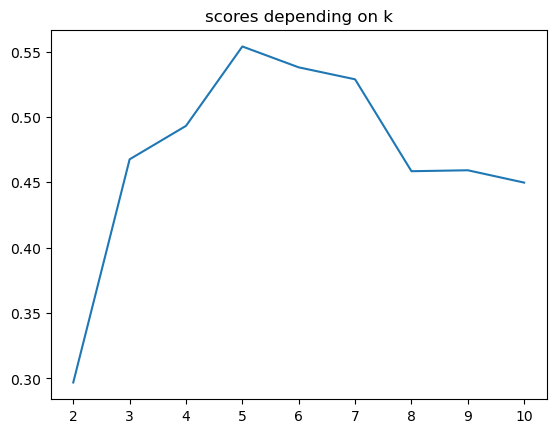

In [13]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [14]:
x = df.iloc[:, -3:]

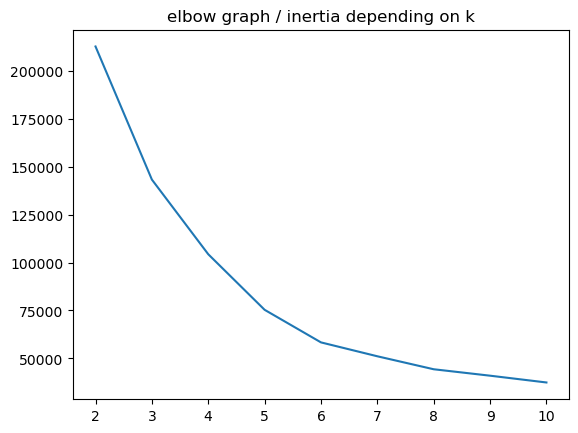

In [15]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(x)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(x, km.labels_))
sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

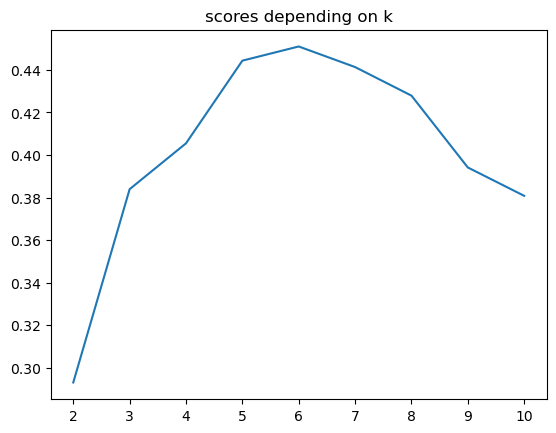

In [16]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [17]:
km = KMeans(n_clusters=5).fit(x)

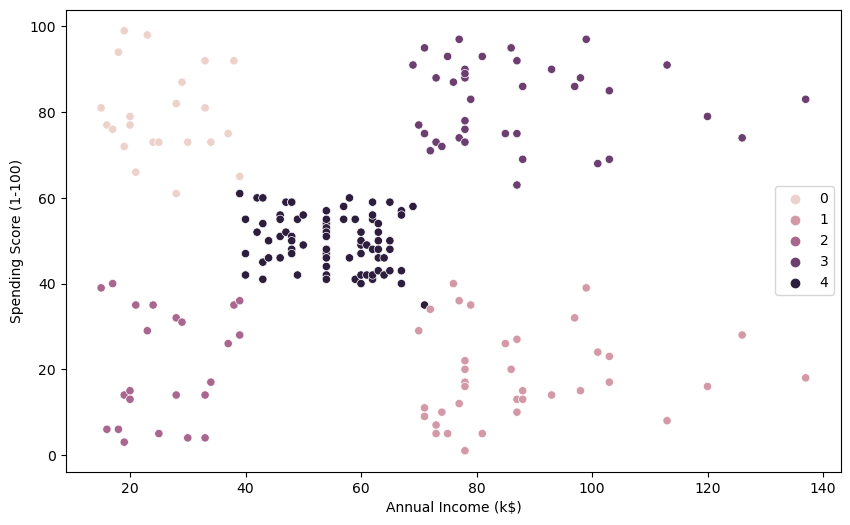

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.iloc[:, 1], y=x.iloc[:, 2], hue=km.labels_)
plt.show()

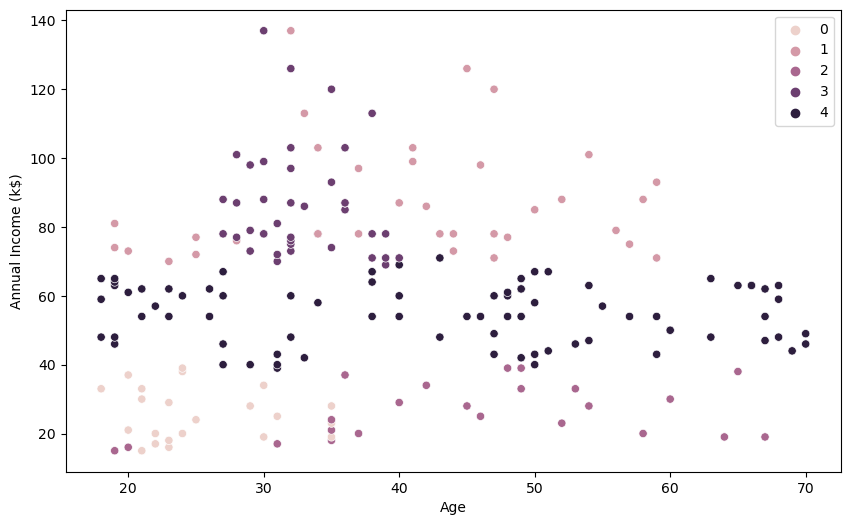

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=km.labels_)
plt.show()

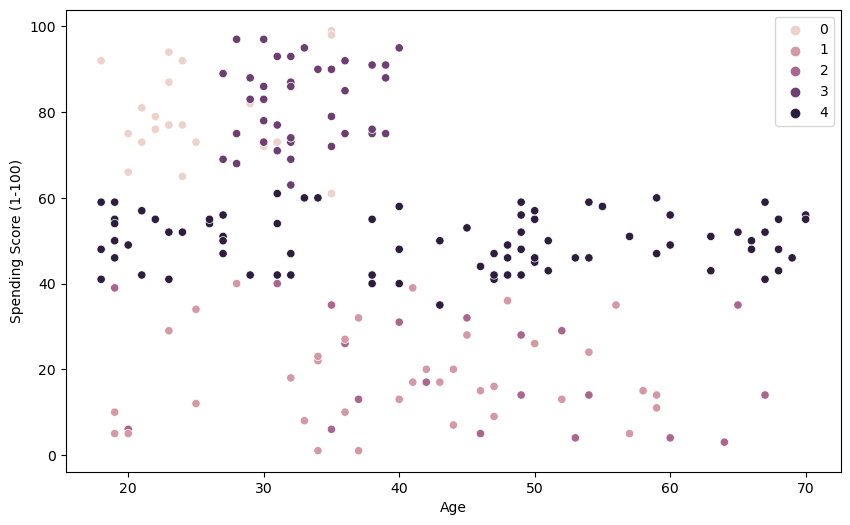

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 2], hue=km.labels_)
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

xs = x.iloc[:, 0]
ys = x.iloc[:, 1]
zs = x.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha = 0.6, c=km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending score')

plt.show()

<Figure size 800x800 with 0 Axes>

In [22]:
x['label'] = km.labels_

In [23]:
x.label.value_counts()

label
4    79
3    39
1    37
2    23
0    22
Name: count, dtype: int64

In [24]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(x[x.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  22.000000           22.000000               22.000000
mean   25.272727           25.727273               79.363636
min    18.000000           15.000000               61.000000
max    35.000000           39.000000               99.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  37.000000           37.000000               37.000000
mean   40.324324           87.432432               18.189189
min    19.000000           70.000000                1.000000
max    59.000000          137.000000               40.000000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   45.217391           26.304348               20.913043
min    19.000000           15.000000                3.000000
max    67.000000           39.000000               40.000000



cluster nb : 3
             Age

In [25]:
x[x.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,37.000000,37.000000,37.000000
mean,40.324324,87.432432,18.189189
min,19.000000,70.000000,1.000000
max,59.000000,137.000000,40.000000
